# Clasificador de imágenes

In [2]:
import requests
import zipfile
import io

url = "https://storage.googleapis.com/datascience-materials/dogs-vs-cats.zip"
response = requests.get(url)
response.raise_for_status()

with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    z.extractall("dogs-vs-cats")

In [3]:
import os

all_files = os.listdir("dogs-vs-cats/dogs-vs-cats/train")

dog_files = [f for f in all_files if f.startswith("dog.")]
cat_files = [f for f in all_files if f.startswith("cat.")]

print("Primeros 5 archivos de perros:", dog_files[:5])
print("Primeros 5 archivos de gatos:", cat_files[:5])

Primeros 5 archivos de perros: ['dog.3873.jpg', 'dog.1011.jpg', 'dog.5454.jpg', 'dog.7426.jpg', 'dog.6624.jpg']
Primeros 5 archivos de gatos: ['cat.12256.jpg', 'cat.11465.jpg', 'cat.8846.jpg', 'cat.9903.jpg', 'cat.11865.jpg']


A continuación vamos a cargar y mostrar las primeras 9 fotos de perros, redimensionadas:

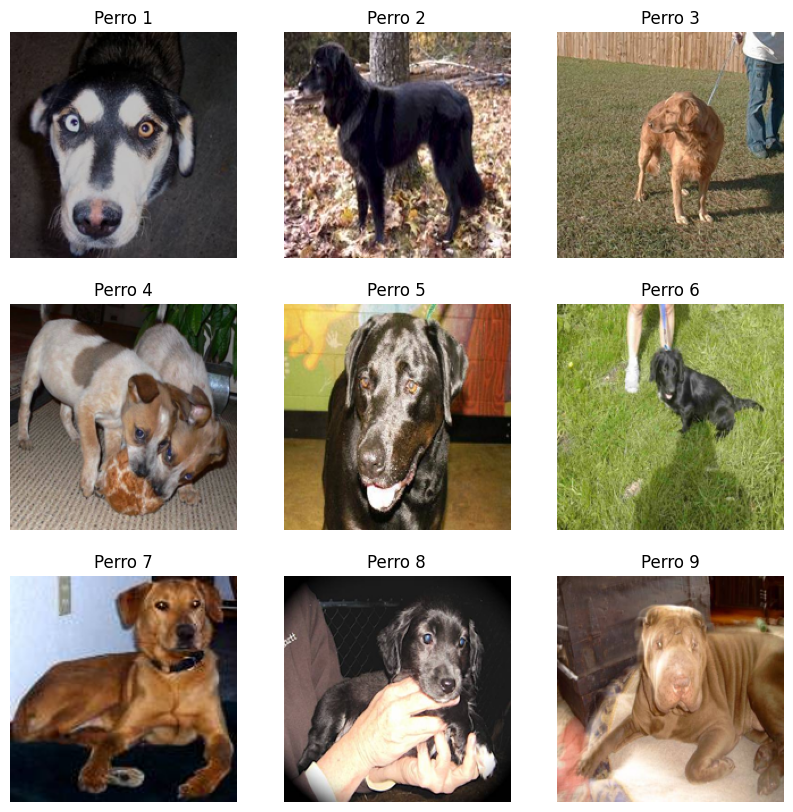

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from PIL import Image

train_dir = "dogs-vs-cats/dogs-vs-cats/train"

plt.figure(figsize=(10, 10))
for i in range(9):
    img_path = os.path.join(train_dir, dog_files[i])
    img = Image.open(img_path).resize((200, 200)) # Redimensionar la imagen
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(f"Perro {i+1}")
    plt.axis("off")

plt.show()

Ahora hacemos lo mismo pero con las de los gatos:

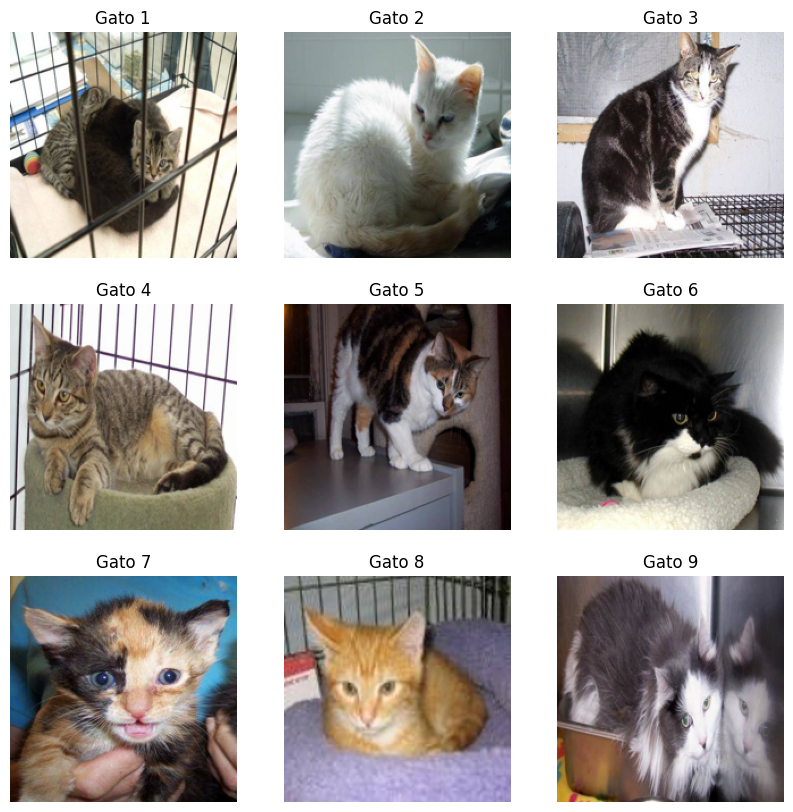

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from PIL import Image

train_dir = "dogs-vs-cats/dogs-vs-cats/train"
0
plt.figure(figsize=(10, 10))
for i in range(9):
    img_path = os.path.join(train_dir, cat_files[i])
    img = Image.open(img_path).resize((200, 200))
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(f"Gato {i+1}")
    plt.axis("off")

plt.show()

Creamos una lista vacía para las etiquetas

In [6]:
labels = []

for file_name in dog_files:
    labels.append(1)

for file_name in cat_files:
    labels.append(0)

print("Primeras 10 etiquetas:", labels[:10])

Primeras 10 etiquetas: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Creamos el DataFrame combinando los archivos de cada uno:

In [7]:
import pandas as pd

all_filenames = dog_files + cat_files

data = {'filename': all_filenames, 'label': labels}

df = pd.DataFrame(data)

display(df.head())

,filename,label
0,dog.3873.jpg,1
1,dog.1011.jpg,1
2,dog.5454.jpg,1
3,dog.7426.jpg,1
4,dog.6624.jpg,1


Entrenamos

In [8]:
from sklearn.model_selection import train_test_split

train_df, validation_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])

print("Primeras filas del DataFrame de entrenamiento:")
display(train_df.head())

print("\nPrimeras filas del DataFrame de validación:")
display(validation_df.head())

Primeras filas del DataFrame de entrenamiento:


,filename,label
7522,dog.440.jpg,1
17493,cat.1025.jpg,0
12260,dog.6373.jpg,1
1275,dog.1205.jpg,1
8004,dog.6093.jpg,1



Primeras filas del DataFrame de validación:


,filename,label
3126,dog.6237.jpg,1
6278,dog.11433.jpg,1
21427,cat.6671.jpg,0
16498,cat.3390.jpg,0
2787,dog.2526.jpg,1


In [ ]:
import numpy as np

def preprocess_image(filename, directory):
    """
    Carga, redimensiona y normaliza una imagen.

    Args:
        filename (str): El nombre del archivo de imagen.
        directory (str): El directorio donde se encuentra el archivo.

    Returns:
        numpy.ndarray: La imagen preprocesada como un arreglo NumPy.
    """
    img_path = os.path.join(directory, filename)
    # Leer la imagen
    img = Image.open(img_path)
    # Redimensionar la imagen
    img = img.resize((200, 200))
    # Convertir la imagen a un arreglo NumPy
    img_array = np.array(img)
    # Normalizar los valores de píxel
    img_array = img_array.astype('float32') / 255.0
    return img_array

: 

In [ ]:
train_images = [preprocess_image(filename, train_dir) for filename in train_df['filename']]

train_images = np.array(train_images)

validation_images = [preprocess_image(filename, train_dir) for filename in validation_df['filename']]

validation_images = np.array(validation_images)

train_labels = train_df['label'].to_numpy()

validation_labels = validation_df['label'].to_numpy()

print("Forma de las imágenes de entrenamiento:", train_images.shape)
print("Forma de las etiquetas de entrenamiento:", train_labels.shape)
print("Forma de las imágenes de validación:", validation_images.shape)
print("Forma de las etiquetas de validación:", validation_labels.shape)